In [66]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GR2M model, (Mouelhi, 2006)

Two-parameter monthly water balance model

$S_1\ =\ \frac{S\ +\ \chi_{1}\varphi}{1\ +\ \varphi\frac{S}{\chi_{1}}}\ ,with\ \varphi\ =\ tanh(\frac{P}{\chi_{1}})\ \ \ (1)$

$P_1\ =\ P\ +\ S\ -\ S_1\ \ \ (2)$ 



$S_2\ =\ \frac{S_1(1\ -\ \psi)}{1\ +\ \psi(1\ -\ \frac{S_1}{\chi_{1}})}\ ,with\ \psi\ =\ tanh(\frac{E}{\chi_{1}})\ \ \ (3)$
$

$S\ = \frac{S_2}{[1\ +\ (\frac{S_2}{\chi_1})^{3}]^{1/3}},\ P_2\ =\ S_2\ -\ S\ \ \ (4)$

$P_3\ =\ P_1\ +\ P_2\ \ \ (5)$

$R_1\ =\ R\ +\ P_3\ \ \ (6)$

$R_2\ =\ \chi_2\ *\ R_1\ \ \ (7)$

$Q\ =\ \frac{R_2^{2}}{R_2\ +\ 60},\ R\ =\ R_2\ -\ Q\ \ \ (8)$


In [73]:
def Gr2m(E,P,x1,x2,So=325.35,Ro=30):
    #EP=EP*Area*3.858e-4
    #P =Area*P*3.858e-4
    S = [So]
    R = [Ro]
    Q=[]
    for i in range(len(P)):
        vphi = np.tanh(P[i]/x1) 
        S1 = (S[-1] + x1*vphi)/(1 + vphi*(S[-1]/x1))     # (1)
        P1 = P[i] + S[-1] - S1                      # (2)
        psi = np.tanh(E[i]/x1)
        S2 = S1(1 - psi)/(1 + psi(1-(S1/x1)))       # (3)
        S.append(S2/(1 + (S2/x1)**3)**(1/3.))
        P2 = S2 - S[-1]
        P3 = P1 + P2
        R1 = R[-1] + P3
        R2 = x2*R1
        Q.append(R2**2./(R2+60))
        R.append(R2 - Q[-1])
    return Q

## Measurements

In [84]:
df = pd.read_csv('Gr2m_example_data.csv',index_col=0)
df.index = df.index.to_datetime()
df.head(10)

,Qo,P,E
1990-01-01,9.07,52.79,10.44
1990-02-01,19.99,106.52,18.42
1990-03-01,16.29,16.67,44.05
1990-04-01,7.37,60.44,72.97
1990-05-01,6.64,34.25,100.41
1990-06-01,5.62,90.44,114.86
1990-07-01,6.95,38.61,125.19
1990-08-01,5.59,54.99,103.16
1990-09-01,6.18,50.85,67.37
1990-10-01,8.24,94.71,31.80


In [85]:
def Gr2m(E,P,x1,x2,So=325.35,Ro=30):
    S = [So]
    R = [Ro]
    Q=[]
    for i in range(len(P)):
        vphi = np.tanh(P[i]/x1)
        S1 = (S[-1] + x1*vphi)/(1 + vphi*(S[-1]/x1))
        P1 = P[i] + S[-1] - S1
        psi = np.tanh(E[i]/x1)
        S2 = S1*(1 - psi)/(1 + psi*(1-(S1/x1)))
        S.append(S2/(1 + (S2/x1)**3)**(1/3.))
        P2 = S2 - S[-1]
        P3 = P1 + P2
        R1 = R[-1] + P3
        R2 = x2*R1
        Q.append(R2**2./(R2+60))
        R.append(R2 - Q[-1])
    return Q

In [86]:
P = df['P'].values # monthly rainfall
E = df['E'].values # monthly pan evaporation - Cenicafe Method
Qo = df['Qo'].values # monthly measured runoff
So = 325.35
Ro=30
x1 = 650.7
x2 = .8
Qs = Gr2m(E,P,x1,x2)

## Plot measurements vs Simulations

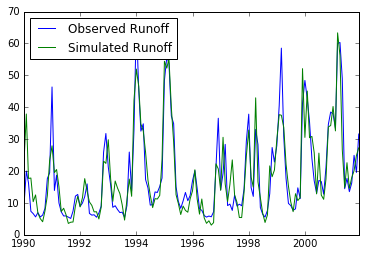

In [88]:
%matplotlib inline
plt.plot(df.index,Qo,label='Observed Runoff')
plt.plot(df.index,Qs,label='Simulated Runoff')
plt.legend(loc='best')
plt.show()

## REFERENCES

Mouelhi, S., Michel, C., Perrin, C., & Andréassian, V. (2006). Stepwise development of a two-parameter monthly water balance model. Journal of Hydrology, 318(1), 200-214.